# Classifying Digits: A Beginner's Tutorial
* In this notebook we use a CNN to train and classify images to 10 different classes (handwritten digits 0-9).

## Table of Contents
* [Prepare Data](#Prepare-Data)
* [Normalize](#Normalize)
* [Reshaping](#Reshaping)
* [One Hot Encoding](#One-Hot-Encoding)
* [Training & Testing](#Training-Testing)
* [Visualizing Images](#Visualizing-Images)
* [CNN](#CNN)
* [Predictions](#Predictions)


In [3]:
#import required libraries
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

## Prepare Data

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
#let's check out our data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above we see that the dataframe has 785 columns with 1 column referring to the label. Our data will take the shape 28X28 = 784 when visualizing images. The label column refers to what class each digit takes. (i.e. digit 5 will be in class 5 and vice-versa). To proceed we will visualize the number of values per digit and also create our y column ('label').

In [8]:
#init our training and testing
y_train = train['label']
X_train = train.drop(labels = ['label'], axis = 1)

In [9]:
#How many classes do we have.
print(train['label'].unique())
print('The number of classes is: ' + str(len(train['label'].unique())))

[1 0 4 7 3 5 8 9 2 6]
The number of classes is: 10


In [10]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

For the most part, our labels look to be pretty evenly distributed. The next step is to look at whether there are any missing values in the data.

In [11]:
print('Number of missing values is: ' + str(X_train.isnull().any().sum()))

Number of missing values is: 0


## Normalize
* Our machine learning algorithm will perform much better if we normalize the data. We can look at what range the values take, however in this dataset they are images and we have pixel values ranging from 0-255 inclusively. Therefore if we divide each value by 255.0 we will normalize all of our data to be on a 0-1 scale which will help out our classification model a lot.

In [12]:
print('Range is: ' + str(X_train.values.min()) + '-' + str(X_train.values.max()))

Range is: 0-255


In [13]:
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.astype('float32')
test = test.astype('float32')

## Reshaping 
* We must reshape our data because if we investigate the shape of our training dataset we see that there are 784 columns. In order for our algorithm to classify our data we must reshape it into 28X28 values.

In [14]:
X_train.shape

(42000, 784)

In [15]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [23]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## One Hot Encoding
* We will use keras to_categorical to one hot encode our labels. Therefore it will create an array of length 10 with a 1 representing True. Each position (index) in the array will correspond to the class. So if we have a 1 in index 2 then that will represent a classification of class 2 (assuming index 0 represents class 0). 

In [24]:
y_train = to_categorical(y_train, num_classes = 10)

## Training-Testing

In [25]:
#splitting into training and validation sets to measure model performance.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

## Visualizing Images
* It will be helpful to visualize our images so we can understand what data will be fed into our algorithm

In [26]:
X_train.shape

(37800, 28, 28, 1)

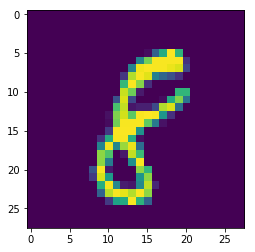

In [27]:
#look at data shape above. We choose 1st row, then all 28 X 28 pixel values and then 1 to allow matplotlib to identify the image.
img = plt.imshow(X_train[0][:,:,0])

## CNN

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax")) #10 classes 

In [29]:
model.compile (optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
#can use GPU to speed up training times here.
history = model.fit(X_train, y_train,
                   batch_size = 100,
                    epochs = 20,
                    validation_data = (X_valid, y_valid),
                    verbose = 1,
                   steps_per_epoch = X_train.shape[0] // 100)

Epoch 1/20
378/378 [==============================] - 298s 789ms/step - loss: 1.6643 - accuracy: 0.4170 - val_loss: 0.4793 - val_accuracy: 0.8757
Epoch 2/20
378/378 [==============================] - 288s 762ms/step - loss: 0.5142 - accuracy: 0.8360 - val_loss: 0.2381 - val_accuracy: 0.9305
Epoch 3/20
378/378 [==============================] - 308s 814ms/step - loss: 0.3234 - accuracy: 0.8980 - val_loss: 0.1750 - val_accuracy: 0.9488
Epoch 4/20
378/378 [==============================] - 295s 781ms/step - loss: 0.2450 - accuracy: 0.9240 - val_loss: 0.1425 - val_accuracy: 0.9567
Epoch 5/20
378/378 [==============================] - 295s 780ms/step - loss: 0.2010 - accuracy: 0.9375 - val_loss: 0.1200 - val_accuracy: 0.9655
Epoch 6/20
378/378 [==============================] - 285s 754ms/step - loss: 0.1750 - accuracy: 0.9448 - val_loss: 0.1109 - val_accuracy: 0.9679
Epoch 7/20
378/378 [==============================] - 198s 523ms/step - loss: 0.1547 - accuracy: 0.9494 - val_loss: 0.0967 -

We can easily plot our training and validation accuracy & loss to show whether or not our model overfit.

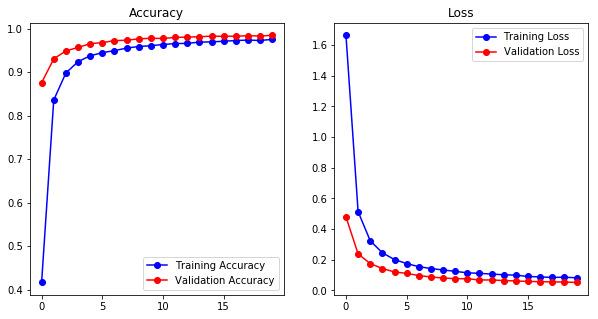

In [31]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

#accuracy plot
ax[0].plot(history.history['accuracy'], color = 'b', label = 'Training Accuracy', marker = 'o')
ax[0].plot(history.history['val_accuracy'], color = 'r', label = 'Validation Accuracy', marker = 'o')
ax[0].set_title('Accuracy')
ax[0].legend(loc = 'best')

#loss plot
ax[1].plot(history.history['loss'], color = 'b', label = 'Training Loss', marker = 'o')
ax[1].plot(history.history['val_loss'], color = 'r', label = 'Validation Loss', marker = 'o')
ax[1].set_title('Loss')
ax[1].legend(loc = 'best')

## Predictions

In [32]:
predicted_classes = model.predict_classes(test)
predicted_classes = predicted_classes.reshape(-1,1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
submission_df = pd.DataFrame(predicted_classes)
submission_df.index.rename('ImageId', inplace = True)
submission_df.index+=1
cols = ['Label']
submission_df.columns = [i for i in cols]

In [34]:
#write file to csv output
submission_df.to_csv('submission.csv')

In [36]:
submission_df.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
